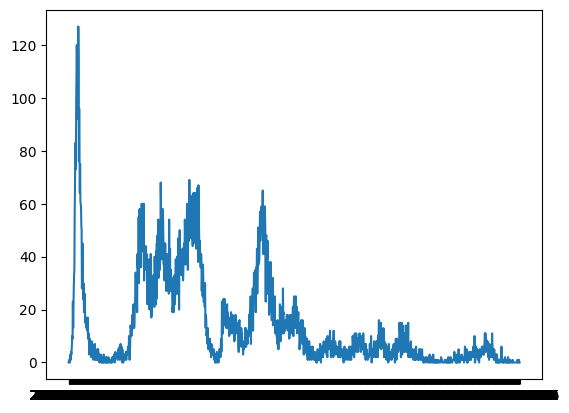

In [3]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

df = pd.read_csv("../data/COVID-19_ic_opnames.csv", delimiter=";")
df.head(10)

plt.plot(df["Date_of_statistics"], df["IC_admission"])
plt.show()



In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt

opnames = pd.read_csv("../opnames.csv", delimiter=";")



def get_icu_multiplier(day: int, amount_of_patients: int):
    #https://www.eerstekamer.nl/overig/20230914/interactieve_tijdlijn_ic_3/document#:~:text=Eerst%20worden%20er%20vooral%20regionale,vanaf%2013%20oktober%202020%20noodzakelijk.&text=De%20IC%2Dcapaciteit%20is%20sinds,te%20hoog%20en%20te%20lang.

    # Get two years of covid data 
    covid_data_full_path = os.path.join("..", "data", "COVID-19_ic_opnames.csv")
    covid_data = pd.read_csv(covid_data_full_path, delimiter=";")
    covid_data["Date_of_statistics"] = pd.to_datetime(covid_data["Date_of_statistics"])

    mask = (covid_data['Date_of_statistics'] > covid_data['Date_of_statistics'][0]) & (covid_data['Date_of_statistics'] <= covid_data['Date_of_statistics'][730])

    covid_data: pd.DataFrame = covid_data.loc[mask]
    if (day > len(covid_data)):
        day = day - ((day % len(covid_data)) * len(covid_data))
    
    admissions = covid_data["IC_admission"][day]

    # The amount admissions currently is, is all the IC admissions across the netherlands. To get an estimate of the amount that would have been admitted to AMC we do the following:
    # There were a total of 1150 IC beds, when covid hit this was upscaled to 1350. AMC has around 32 IC beds generally if use the growth and apply it percentage wise
    # to the 32 we should get an estimate of how many beds there were
    amount_of_beds = int(1350 * (32 / 1150))
    percentage_of_admissions = amount_of_beds / 1350
    admissions = int(percentage_of_admissions * admissions)
    print(admissions)
    if(admissions == 0 or amount_of_patients == 0 or amount_of_patients > admissions):
        return 1
    
    

    return admissions / amount_of_patients

get_icu_multiplier(33, 2)

3


1.5

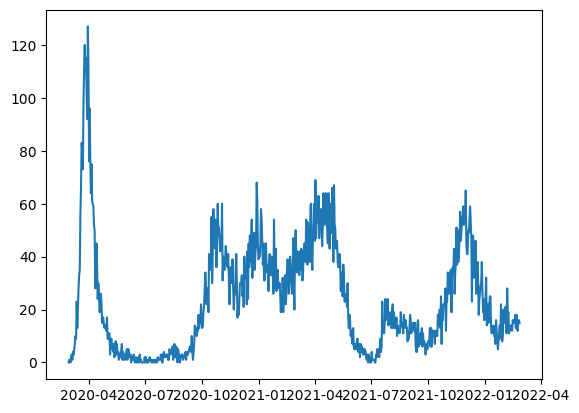

In [33]:
covid_data_full_path = os.path.join("..", "data", "COVID-19_ic_opnames.csv")
covid_data = pd.read_csv(covid_data_full_path, delimiter=";")
covid_data["Date_of_statistics"] = pd.to_datetime(covid_data["Date_of_statistics"])

mask = (covid_data['Date_of_statistics'] > covid_data['Date_of_statistics'][0]) & (covid_data['Date_of_statistics'] <= covid_data['Date_of_statistics'][730])

covid_data: pd.DataFrame = covid_data.loc[mask]
plt.plot(covid_data["Date_of_statistics"], covid_data["IC_admission"])
plt.show()

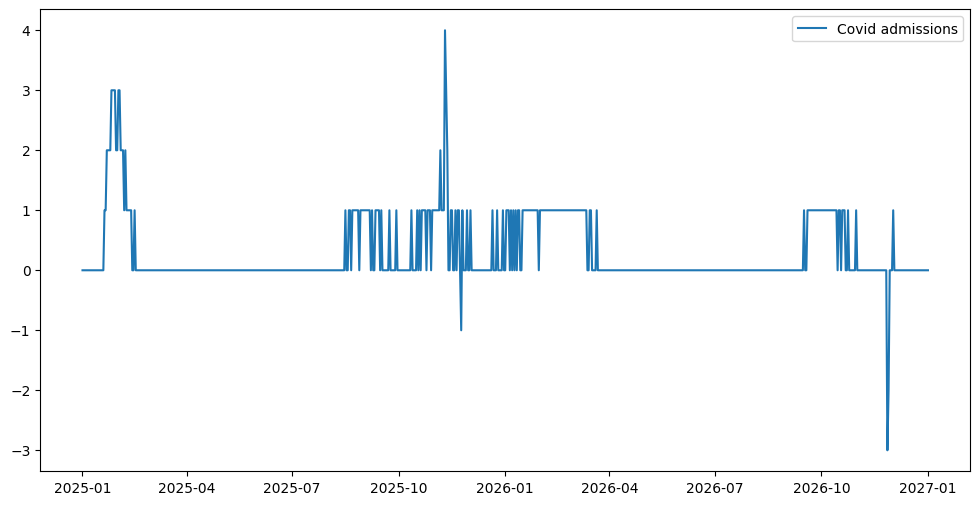

In [58]:

amounts_without_spike = pd.read_csv('../runs/run1/params0/amount.csv', delimiter=";")
amounts_with_spike = pd.read_csv('../runs/run2/params0/amount.csv', delimiter=";")

amounts_with_spike["date"] = pd.to_datetime(amounts_with_spike["date"])
amounts_without_spike["date"] = pd.to_datetime(amounts_without_spike["date"])

plt.figure(figsize=(12, 6))
plt.plot(amounts_without_spike["date"], amounts_with_spike["admissions"] - amounts_without_spike["admissions"] , label="Covid admissions")
plt.legend()
plt.show()